# S&P 500 Positive Days Per Year

## Objective

The objective of this analysis is to see what percentage of days in a year the S&P 500 has a positive vs negative return. I also want to know what the average return is per positive and negative day

## Steps

#### The first step is to import the required packages

In [1]:
import pandas as pd
from pandas_datareader import data as wb

import datetime

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Specify index and start/end dates

In [2]:
# ^GSPC is the ticker for S&P500 on yahoo finance
# The index_name variable will be used for the graph titles and file names
index = '^GSPC'
index_name = 'S&P 500'

# These date variables are for the graphs to specify in the title the time period
# Start_date_files is the variable used in the file name since file names can't have /
start_date = datetime.date(2000,1,1).strftime('%m/%d/%Y')
start_date_files = datetime.date(2000,1,1).strftime('%m.%d.%Y')

end_date = datetime.datetime.today().strftime('%m/%d/%Y')
end_date_files = datetime.datetime.today().strftime('%m.%d.%Y')

# Create datetime objects for the years so that the x-axis of the graphs is formatted correctly
years = range(2000,2021)
years_datetime = []

for year in years:
    years_datetime.append(datetime.datetime(year,1,1))

#### Create dataframe

In [3]:
df = pd.DataFrame()

df['level'] = wb.DataReader(index, data_source='yahoo', start=f'1999-12-31', end=end_date)['Adj Close']
df['return'] = (df['level']/df['level'].shift(1)) - 1
df = df.dropna()

In [4]:
df.head()

,level,return
Date,,
2000-01-03,1455.219971,-0.009549
2000-01-04,1399.420044,-0.038345
2000-01-05,1402.109985,0.001922
2000-01-06,1403.449951,0.000956
2000-01-07,1441.469971,0.027090


In [5]:
df.tail()

,level,return
Date,,
2020-07-13,3155.219971,-0.009363
2020-07-14,3197.520020,0.013406
2020-07-15,3226.560059,0.009082
2020-07-16,3215.570068,-0.003406
2020-07-17,3224.729980,0.002849


#### Create filters for only positive days and only negative days. 

For this analysis, I've assumed that a day with a 0% return is a positive day

In [6]:
positive_df = df['return']>=0
negative_df = df['return']<0

df[positive_df]

,level,return
Date,,
2000-01-05,1402.109985,0.001922
2000-01-06,1403.449951,0.000956
2000-01-07,1441.469971,0.027090
2000-01-10,1457.599976,0.011190
2000-01-13,1449.680054,0.012170
...,...,...
2020-07-08,3169.939941,0.007827
2020-07-10,3185.040039,0.010466
2020-07-14,3197.520020,0.013406


#### Calculate the average days that are positive over the time period and avg positive/negative return

In [7]:
avg_days_positive = positive_df.sum() / len(df)
avg_positive_perf = df[positive_df]['return'].mean()
avg_negative_perf = df[negative_df]['return'].mean()

print(avg_days_positive)
print(avg_positive_perf)
print(avg_negative_perf)

0.5365712074303406
0.007835638988743036
-0.008573263691416937


#### Calculate the statistics are for each year

I want to see what the statistics look like for each year to see how much it varies from year to year. 
To do this, I will loop through the years, adding the data to a dictionary. 
I will then create a dataframe from the dictionary

In [8]:
stats_dict = {}

for year in years:
    positive_days = df[positive_df]['return'].loc[str(year)].count()
    negative_days = df[negative_df]['return'].loc[str(year)].count()
    total_days = negative_days + positive_days
    avg_positive = df[positive_df]['return'].loc[str(year)].mean()
    avg_negative = df[negative_df]['return'].loc[str(year)].mean()
    avg_total = df['return'].loc[str(year)].mean()
    
    stats_dict[str(year)] = {
        'positive_days': positive_days, 
        'negative_days': negative_days, 
        'total_days': total_days, 
        'avg_positive': avg_positive, 
        'avg_negative': avg_negative, 
        'avg_total': avg_total}

stats_df = pd.DataFrame.from_dict(stats_dict)
stats_df = stats_df.T

In [9]:
stats_df

,positive_days,negative_days,total_days,avg_positive,avg_negative,avg_total
2000,120.0,132.0,252.0,0.010826,-0.010465,-0.000327
2001,119.0,129.0,248.0,0.010192,-0.010308,-0.000472
2002,112.0,140.0,252.0,0.013170,-0.012196,-0.000922
2003,138.0,114.0,252.0,0.008491,-0.008097,0.000987
2004,140.0,112.0,252.0,0.005217,-0.005697,0.000366
2005,141.0,111.0,252.0,0.004732,-0.005698,0.000138
2006,141.0,110.0,251.0,0.004694,-0.004810,0.000529
2007,137.0,114.0,251.0,0.006754,-0.007701,0.000189
2008,127.0,126.0,253.0,0.015727,-0.019038,-0.001587
2009,140.0,112.0,252.0,0.012012,-0.012802,0.000983


#### Create a chart to display the avg positive/negative return for the year as well as the percentage of days that were positive

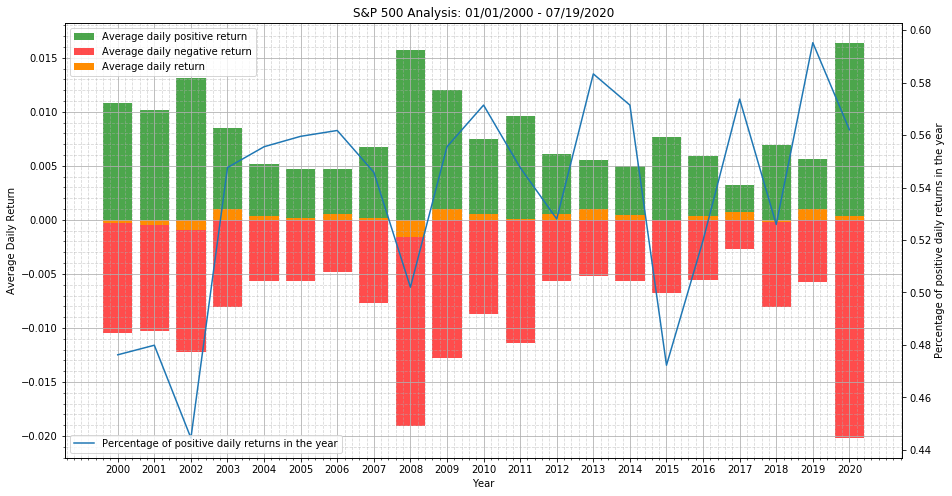

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

axs.bar(stats_df.index, stats_df.avg_positive, color='green', alpha=0.7, label='Average daily positive return')
axs.bar(stats_df.index, stats_df.avg_negative, color='red', alpha=0.7, label='Average daily negative return')
axs.bar(stats_df.index, stats_df.avg_total, color='darkorange', label='Average daily return')

ax2 = axs.twinx()
ax2.plot(stats_df.index, (stats_df.positive_days / stats_df.total_days), label='Percentage of positive daily returns in the year')

axs.set_ylabel('Average Daily Return')
ax2.set_ylabel('Percentage of positive daily returns in the year')
axs.set_xlabel('Year')
axs.set_title(f'S&P 500 Analysis: {start_date} - {end_date}')

axs.legend(loc='upper left')
ax2.legend(loc='lower left')

axs.minorticks_on()
axs.grid(True, which='major', axis='both')
axs.grid(True, which='minor', axis='both', linestyle='--', alpha=0.5)

plt.show()
#fig.savefig(f'{index_name} Daily Return Analysis - {end_date_files}.pdf')

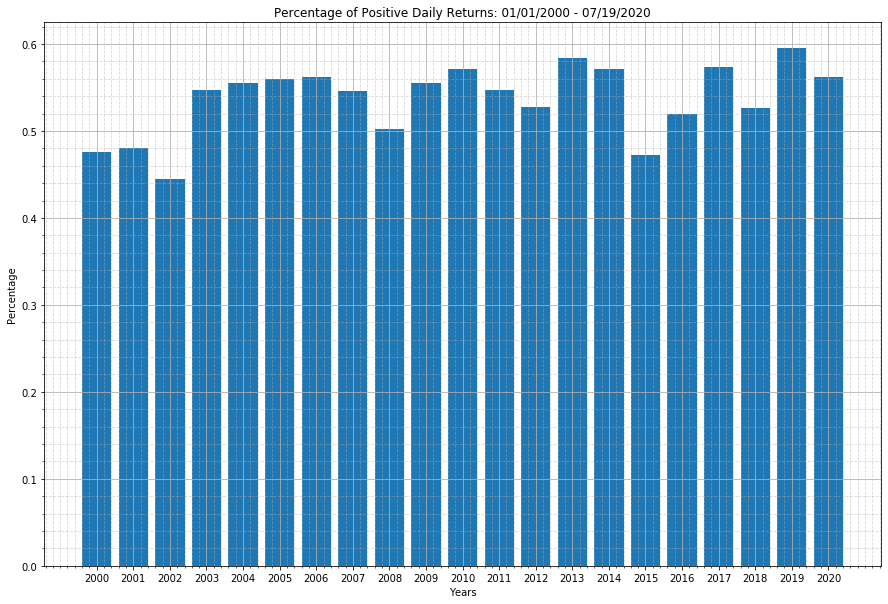

In [11]:
chart = plt.figure(figsize=(15,10))

plt.bar(stats_df.index, (stats_df.positive_days / stats_df.total_days))

plt.minorticks_on()
plt.grid(True, which='major', axis='both')
plt.grid(True, which='minor', axis='both', linestyle='--', alpha=0.5)

plt.title(f'Percentage of Positive Daily Returns: {start_date} - {end_date}')
plt.ylabel('Percentage')
plt.xlabel('Years')

plt.show()

#### Create chart to display a summary of the performance for a year

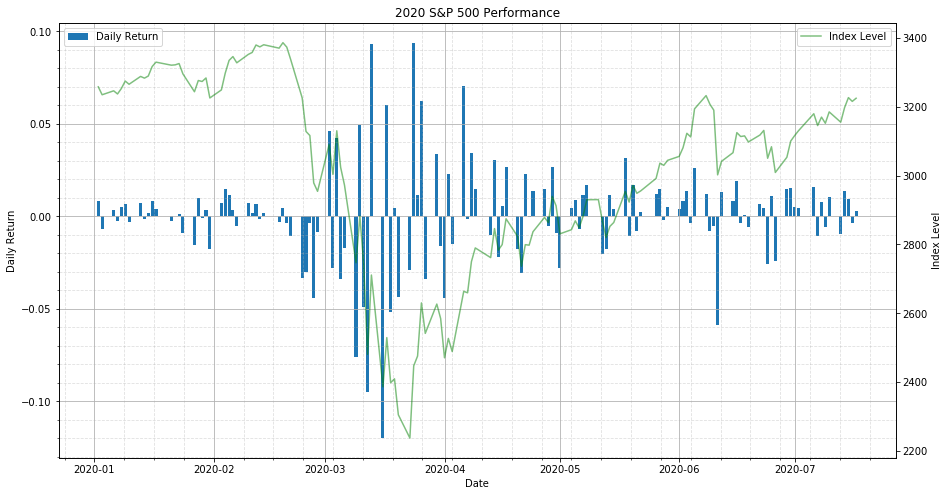

In [12]:
# year is the variable for what year you would like to see the performance for
year = 2020

fig, axs = plt.subplots(1, 1, figsize=(15,8))

axs.bar(df.loc[f'{year}'].index, df['return'].loc[f'{year}'], label='Daily Return',)

ax2 = axs.twinx()
ax2.plot(df['level'].loc[f'{year}'], color='green', label='Index Level', alpha=0.5)

axs.set_ylabel('Daily Return')
ax2.set_ylabel('Index Level')
axs.set_xlabel('Date')
axs.set_title(f'{year} {index_name} Performance')
axs.legend(loc='upper left')
ax2.legend(loc='upper right')

axs.minorticks_on()
axs.grid(True, which='major', axis='both')
axs.grid(True, which='minor', axis='both', linestyle='--', alpha=0.4)

plt.show()
#fig.savefig(f'{index_name} Performance {year}.pdf')